In [20]:
import random
import timeit
import matplotlib.pyplot as plt

1a. **Maximum and minimum element of the array**

In [35]:
def min_max_element(lst):
    max = lst[0]
    min = lst[0]
    for i in lst:
        if i > max:
            max = i
        elif i < min:
            min = i
    return (min, max)

1b. **Median of the array**

In [36]:
a, b = None, None
def Partition(arr, l, r):
    lst = arr[r]
    i = l
    j = l
    while (j < r):
        if arr[j] < lst:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
        j += 1
    arr[i], arr[r] = arr[r], arr[i]
    return i;
def MedianUtil(arr, l, r, k, a1, b1):
    global a, b
    if (l <= r):
        partitionIndex = Partition(arr, l, r)
        if partitionIndex == k:
            b = arr[partitionIndex]
            if (a1 != -1):
                return
        elif (partitionIndex == k - 1):
            a = arr[partitionIndex]
            if (b1 != -1):
                return
        
        if (partitionIndex >= k):
            return MedianUtil(arr, l, partitionIndex - 1, k, a, b)
        else:
            return MedianUtil(arr, partitionIndex + 1, r, k, a, b)

def findMedian(arr, n) :
    global a;
    global b;
    a = -1;
    b = -1;
     
    # If n is odd
    if (n % 2 == 1) :
        MedianUtil(arr, 0, n - 1, n // 2, a, b);
        ans = b;
    else :
        MedianUtil(arr, 0, n - 1, n // 2, a, b);
        ans = (a + b) // 2;
    
    return ans

1c. **The k-smallest element of the array**

In [37]:
def k_th_smallest(arr, k):
    l = [x for x in arr if x < arr[-1]]
    r = [x for x in arr if x > arr[-1]]
    m = [x for x in arr if x == arr[-1]]
    
    L, M = len(l), len(m)
    
    if k <= L:
        return k_th_smallest(l, k)
    if k > L + M:
        return k_th_smallest(r, k - L - M)
    else:
        return m[0]

2a. **The median of the array**

In [38]:
a, b = None, None
def Partition(arr, l, r):
    lst = arr[r]
    i = l
    j = l
    while (j < r):
        if arr[j] < lst:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
        j += 1
    arr[i], arr[r] = arr[r], arr[i]
    return i;
def randomToss(arr, l, r):
    n = r - l + 1
    p = random.randrange(1, 150)%n
    arr[l + p], arr[r] = arr[r], arr[l + p]
    return Partition(arr, l, r)
def MedianUtil(arr, l, r, k, a1, b1):
    global a, b
    if (l <= r):
        partitionIndex = randomToss(arr, l, r)
        if partitionIndex == k:
            b = arr[partitionIndex]
            if (a1 != -1):
                return
        elif (partitionIndex == k - 1):
            a = arr[partitionIndex]
            if (b1 != -1):
                return
        
        if (partitionIndex >= k):
            return MedianUtil(arr, l, partitionIndex - 1, k, a, b)
        else:
            return MedianUtil(arr, partitionIndex + 1, r, k, a, b)

def findMedianRandom(arr, n) :
    global a;
    global b;
    a = -1;
    b = -1;
     
    # If n is odd
    if (n % 2 == 1) :
        MedianUtil(arr, 0, n - 1, n // 2, a, b);
        ans = b;
    else :
        MedianUtil(arr, 0, n - 1, n // 2, a, b);
        ans = (a + b) // 2;
    
    return ans

2b. **The k-smallest element of the array**

In [39]:
def k_th_smallest_random(arr, k):
    if not arr: return
    pivot = random.choice(arr)
    left =  [x for x in arr if x < pivot]
    mid  =  [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    L, M = len(left), len(mid)

    if k <= L:
        return k_th_smallest_random(left, k)
    elif k > L + M:
        return k_th_smallest_random(right, k - L - M)
    else:
        return mid[0]

3. **Prove time complexity**

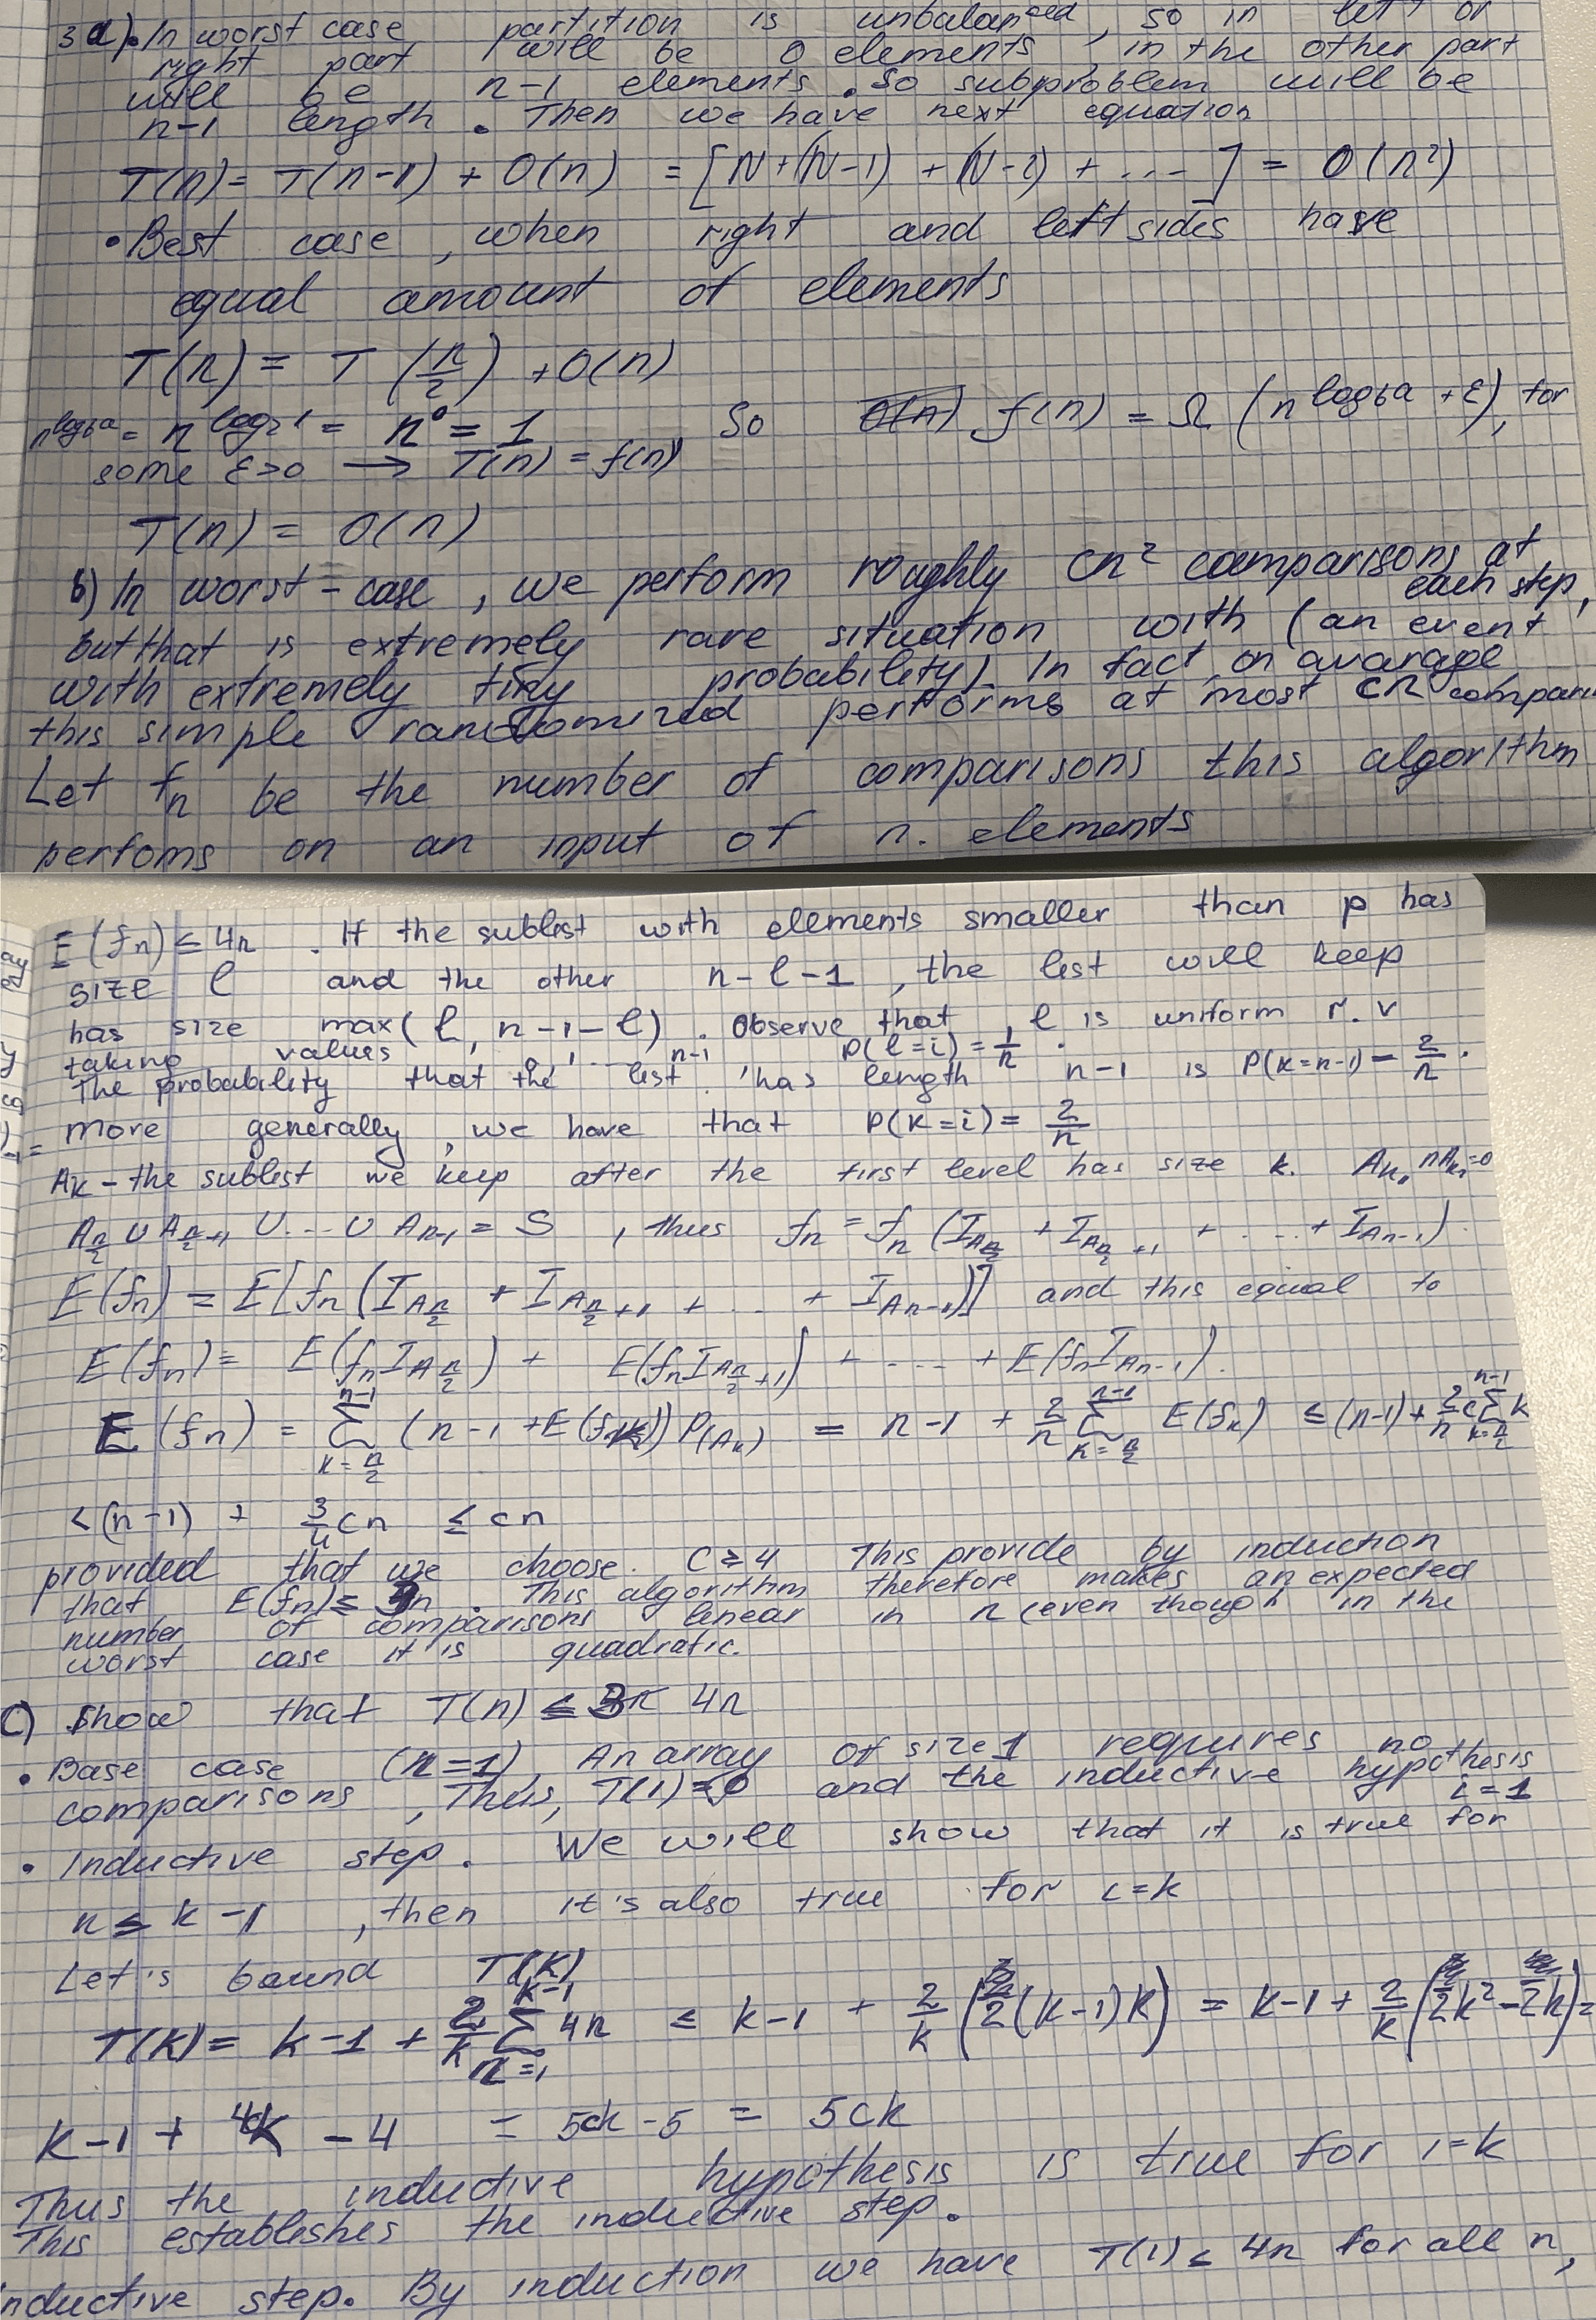

**Actual execution times**

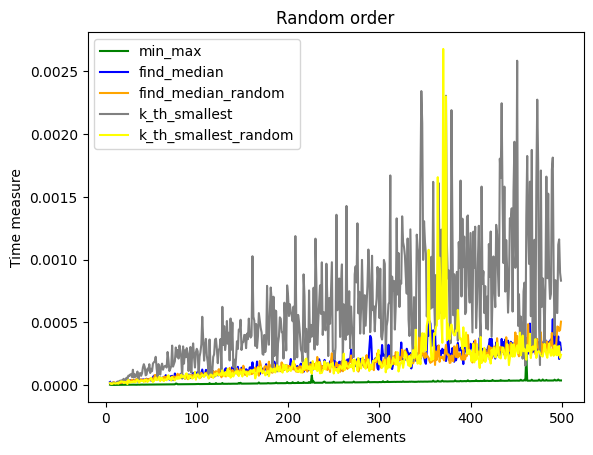

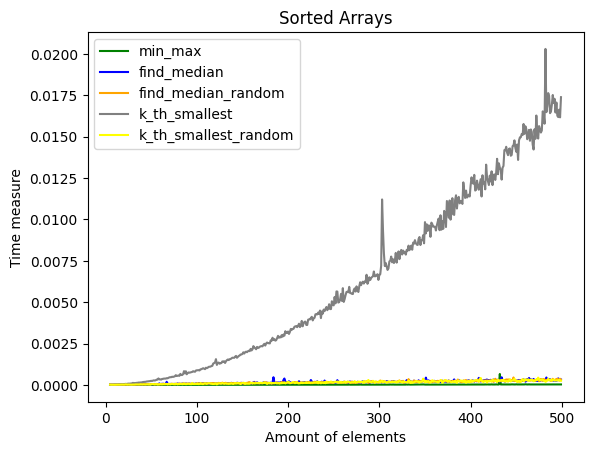

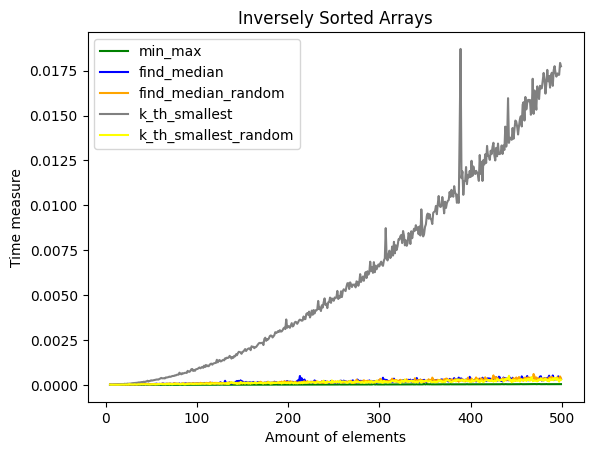

In [41]:
def min_max_t(elements):
    result = []
    for i in elements:
        time = timeit.timeit(lambda: min_max_element(i), number=2)
        result.append(time)
    return result


def find_median_t(elements):
    result = []
    for i in elements:
        time = timeit.timeit(lambda: findMedian(i, len(i)), number=2)
        result.append(time)
    return result

def find_median_random_t(elements):
    result = []
    for i in elements:
        time = timeit.timeit(lambda: findMedianRandom(i, len(i)), number=2)
        result.append(time)
    return result

def k_th_smallest_t(elements):
    result = []
    for i in elements:
        time = timeit.timeit(lambda: k_th_smallest(i, len(i)//2), number=2)
        result.append(time)
    return result

def k_th_smallest_random_t(elements):
    result = []
    for i in elements:
        time = timeit.timeit(lambda: k_th_smallest_random(i, len(i)//2), number=2)
        result.append(time)
    return result

element = [[random.randint(1, 1200)for x in range(i)] for i in range(5,500)]
min_max_time = min_max_t(element)
find_median_time = find_median_t(element)
find_median_random_time = find_median_random_t(element)
k_th_smallest_time = k_th_smallest_t(element)
k_th_smallest_random_time = k_th_smallest_random_t(element)


plt.plot([len(x) for x in element ], min_max_time, 'green')
plt.plot([len(x) for x in element ], find_median_time, 'blue')
plt.plot([len(x) for x in element ], find_median_random_time, 'orange')
plt.plot([len(x) for x in element ], k_th_smallest_time, 'grey')
plt.plot([len(x) for x in element ], k_th_smallest_random_time, 'yellow')
plt.legend(["min_max", 'find_median', 'find_median_random', 'k_th_smallest', 'k_th_smallest_random'])
plt.title("Random order")
plt.ylabel('Time measure')
plt.xlabel('Amount of elements')
plt.show()

min_max_time_s = min_max_t([sorted(x) for x in element])
find_median_time_s = find_median_t([sorted(x) for x in element])
find_median_random_time_s = find_median_random_t([sorted(x) for x in element])
k_th_smallest_time_s = k_th_smallest_t([sorted(x) for x in element])
k_th_smallest_random_time_s = k_th_smallest_random_t([sorted(x) for x in element])


plt.plot([len(x) for x in element ], min_max_time_s, 'green')
plt.plot([len(x) for x in element ], find_median_time_s, 'blue')
plt.plot([len(x) for x in element ], find_median_random_time_s, 'orange')
plt.plot([len(x) for x in element ], k_th_smallest_time_s, 'grey')
plt.plot([len(x) for x in element ], k_th_smallest_random_time_s, 'yellow')
plt.legend(["min_max", 'find_median', 'find_median_random', 'k_th_smallest', 'k_th_smallest_random'])
plt.title("Sorted Arrays")
plt.ylabel('Time measure')
plt.xlabel('Amount of elements')
plt.show()

min_max_time_s = min_max_t([sorted(x)[::-1] for x in element])
find_median_time_s = find_median_t([sorted(x)[::-1] for x in element])
find_median_random_time_s = find_median_random_t([sorted(x)[::-1] for x in element])
k_th_smallest_time_s = k_th_smallest_t([sorted(x)[::-1] for x in element])
k_th_smallest_random_time_s = k_th_smallest_random_t([sorted(x)[::-1] for x in element])


plt.plot([len(x) for x in element ], min_max_time_s, 'green')
plt.plot([len(x) for x in element ], find_median_time_s, 'blue')
plt.plot([len(x) for x in element ], find_median_random_time_s, 'orange')
plt.plot([len(x) for x in element ], k_th_smallest_time_s, 'grey')
plt.plot([len(x) for x in element ], k_th_smallest_random_time_s, 'yellow')
plt.legend(["min_max", 'find_median', 'find_median_random', 'k_th_smallest', 'k_th_smallest_random'])
plt.title("Inversely Sorted Arrays")
plt.ylabel('Time measure')
plt.xlabel('Amount of elements')
plt.show()